## Part1, Task3 ---- Version 2

#### In this implementation, I set the hyperparameters as follow:

- *hidden_units = '20 18'*

- *learning_rate = 1e-2*

- *epoch = 100*

- *batch_size = 32*

#### Optimization:

- SGD optimizer **with** momentum=0.9, L2 regularization and dropout.
The corresponding codes are:

    1. `optimizer = torch.optim.SGD(mlp.parameters(), lr=LEARNING_RATE_DEFAULT, weight_decay=0.01, momentum = 0.9)`

    2. `self.dropouts.append(nn.Dropout(0.6))`



#### Result Analaysis:

- The loss almost reaches convergence. 
- The training accuracy oscillates and the average is about 30%. 
- The testing accuracy is about 29.79%.

#### Questions:

- Why does the result even worse after I use those optimization methods?

(Because the training processes take a lot of time to finish in my computer, I don't have enough time to do more experiences before DDL. But I plan to figure it out later.)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from pytorch_mlp2 import *
from sklearn import datasets
import random
from torch.autograd import Variable
import time


# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20 18'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 100
EVAL_FREQ_DEFAULT = 10
BATCH_SIZE = 32

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset = dset.CIFAR10('./', train=True, transform=transform, target_transform=None, download=False)
testset = dset.CIFAR10('./', train=False, transform=transform, target_transform=None, download=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [3]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

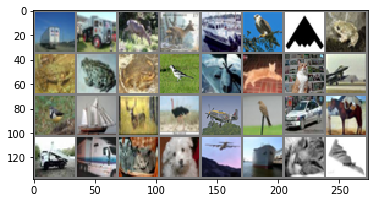

truck     truck      deer      deer      ship      bird     plane      frog      frog      frog      frog      bird     plane       cat       cat     plane      bird      ship      deer      bird     plane      bird       car     horse     truck     truck       cat       dog     plane      ship       cat     plane

trainloader lengh: 1563
dataiter lengh: 1563


In [4]:
# show some random training images
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print('     '.join('%5s'%classes[labels[j]] for j in range(BATCH_SIZE)))
print()
dataiter = iter(trainloader)
print("trainloader lengh: "+str(len(trainloader)))
print("dataiter lengh: "+str(len(dataiter)))

In [5]:
def train():
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    # YOUR TRAINING CODE GOES HERE
    n_inputs = 3072
    
    n_hidden = list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split()))

    n_classes = len(classes)

    mlp = PT_MLP(n_inputs, n_hidden, n_classes)
    
    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss() 

    optimizer = torch.optim.SGD(mlp.parameters(), lr=LEARNING_RATE_DEFAULT, weight_decay=0.01, momentum = 0.9)
    
    losses = []
    accuracy = []
    
    for epoch in range(MAX_EPOCHS_DEFAULT):
        timestart = time.time()
        running_loss = 0.0
        total = 0
        correct = 0
        for step, (batch_x, batch_y) in enumerate(trainloader):
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward + Backward + Optimize
            batch_x = batch_x.view(-1,3072)
            outputs = mlp(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            # print("step ",step)
            if step % 500 == 499:  # print every 500 mini-batches
                    print('[%d, %5d] loss: %.4f' %
                          (epoch, step, running_loss / 500))
                    losses.append(running_loss / 500)
                    running_loss = 0.0
                    _, predicted = torch.max(outputs.data, 1)
                    total += batch_y.size(0)
                    correct += (predicted == batch_y).sum().item()
                    print('Accuracy of the network on the %d tran images: %.3f %%' % (total,
                            100.0 * correct / total))
                    accuracy.append(100.0 * correct / total)
                    total = 0
                    correct = 0
                    
        print('epoch %d cost %3f sec' %(epoch,time.time()-timestart))
    print('Finished Training')
    return mlp, losses, accuracy

In [6]:
mlp, losses, accuracy = train()

[0,   499] loss: 2.0265
Accuracy of the network on the 32 tran images: 31.250 %
[0,   999] loss: 1.9716
Accuracy of the network on the 32 tran images: 37.500 %
[0,  1499] loss: 1.9671
Accuracy of the network on the 32 tran images: 18.750 %
epoch 0 cost 13.638048 sec
[1,   499] loss: 1.9533
Accuracy of the network on the 32 tran images: 40.625 %
[1,   999] loss: 1.9541
Accuracy of the network on the 32 tran images: 21.875 %
[1,  1499] loss: 1.9433
Accuracy of the network on the 32 tran images: 37.500 %
epoch 1 cost 13.327450 sec
[2,   499] loss: 1.9340
Accuracy of the network on the 32 tran images: 31.250 %
[2,   999] loss: 1.9540
Accuracy of the network on the 32 tran images: 37.500 %
[2,  1499] loss: 1.9476
Accuracy of the network on the 32 tran images: 21.875 %
epoch 2 cost 14.088558 sec
[3,   499] loss: 1.9410
Accuracy of the network on the 32 tran images: 31.250 %
[3,   999] loss: 1.9464
Accuracy of the network on the 32 tran images: 25.000 %
[3,  1499] loss: 1.9424
Accuracy of the

[30,  1499] loss: 1.9485
Accuracy of the network on the 32 tran images: 28.125 %
epoch 30 cost 12.381988 sec
[31,   499] loss: 1.9380
Accuracy of the network on the 32 tran images: 43.750 %
[31,   999] loss: 1.9479
Accuracy of the network on the 32 tran images: 31.250 %
[31,  1499] loss: 1.9442
Accuracy of the network on the 32 tran images: 25.000 %
epoch 31 cost 11.666998 sec
[32,   499] loss: 1.9347
Accuracy of the network on the 32 tran images: 34.375 %
[32,   999] loss: 1.9471
Accuracy of the network on the 32 tran images: 43.750 %
[32,  1499] loss: 1.9431
Accuracy of the network on the 32 tran images: 34.375 %
epoch 32 cost 12.769561 sec
[33,   499] loss: 1.9383
Accuracy of the network on the 32 tran images: 37.500 %
[33,   999] loss: 1.9436
Accuracy of the network on the 32 tran images: 21.875 %
[33,  1499] loss: 1.9475
Accuracy of the network on the 32 tran images: 25.000 %
epoch 33 cost 14.242868 sec
[34,   499] loss: 1.9318
Accuracy of the network on the 32 tran images: 28.125

epoch 60 cost 10.744730 sec
[61,   499] loss: 1.9407
Accuracy of the network on the 32 tran images: 25.000 %
[61,   999] loss: 1.9407
Accuracy of the network on the 32 tran images: 46.875 %
[61,  1499] loss: 1.9486
Accuracy of the network on the 32 tran images: 25.000 %
epoch 61 cost 11.413279 sec
[62,   499] loss: 1.9359
Accuracy of the network on the 32 tran images: 31.250 %
[62,   999] loss: 1.9426
Accuracy of the network on the 32 tran images: 25.000 %
[62,  1499] loss: 1.9402
Accuracy of the network on the 32 tran images: 31.250 %
epoch 62 cost 11.259277 sec
[63,   499] loss: 1.9325
Accuracy of the network on the 32 tran images: 15.625 %
[63,   999] loss: 1.9375
Accuracy of the network on the 32 tran images: 31.250 %
[63,  1499] loss: 1.9464
Accuracy of the network on the 32 tran images: 28.125 %
epoch 63 cost 9.265289 sec
[64,   499] loss: 1.9385
Accuracy of the network on the 32 tran images: 37.500 %
[64,   999] loss: 1.9477
Accuracy of the network on the 32 tran images: 21.875 

[91,   999] loss: 1.9461
Accuracy of the network on the 32 tran images: 34.375 %
[91,  1499] loss: 1.9433
Accuracy of the network on the 32 tran images: 18.750 %
epoch 91 cost 8.962985 sec
[92,   499] loss: 1.9455
Accuracy of the network on the 32 tran images: 18.750 %
[92,   999] loss: 1.9407
Accuracy of the network on the 32 tran images: 31.250 %
[92,  1499] loss: 1.9417
Accuracy of the network on the 32 tran images: 18.750 %
epoch 92 cost 9.080127 sec
[93,   499] loss: 1.9319
Accuracy of the network on the 32 tran images: 34.375 %
[93,   999] loss: 1.9479
Accuracy of the network on the 32 tran images: 31.250 %
[93,  1499] loss: 1.9516
Accuracy of the network on the 32 tran images: 25.000 %
epoch 93 cost 7.415017 sec
[94,   499] loss: 1.9412
Accuracy of the network on the 32 tran images: 15.625 %
[94,   999] loss: 1.9473
Accuracy of the network on the 32 tran images: 25.000 %
[94,  1499] loss: 1.9378
Accuracy of the network on the 32 tran images: 31.250 %
epoch 94 cost 7.102796 sec
[

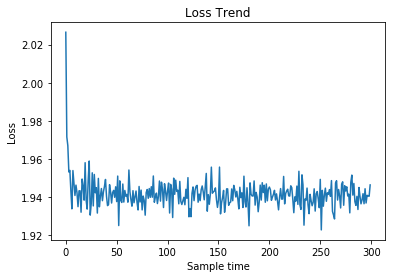

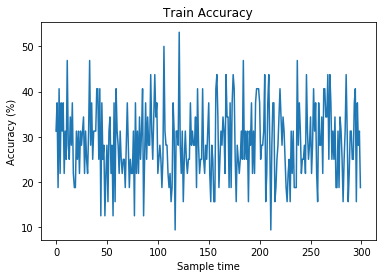

In [7]:
plt.title('Loss Trend')

plt.plot(losses)
    
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()

plt.title('Train Accuracy')

plt.plot(accuracy)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()



In [8]:
def test(mlp):
    total = 0
    correct = 0
    accuracy = []
    for step, (batch_x, batch_y) in enumerate(testloader):
        batch_x = batch_x.view(-1,3072)
        outputs = mlp(batch_x)
        # print statistics
        # print("step ",step)
        if step % 20 == 19:  # print every 500 mini-batches
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
                accuracy.append(100.0 * correct / total)
                total = 0
                correct = 0
    print('Finished Testing')
    return accuracy

In [9]:
test_accuracy = test(mlp)

Finished Testing


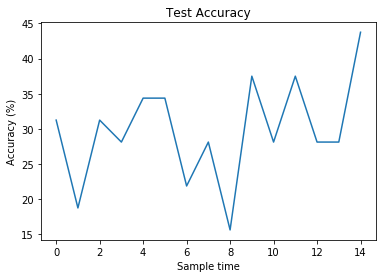

Average test accuracy is : 29.791666666666668


In [10]:
plt.title('Test Accuracy')

plt.plot(test_accuracy)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

avg_test_accuracy = np.mean(test_accuracy)
print("Average test accuracy is : " + str(avg_test_accuracy))